## 1、数据准备

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

from pylab import *
plt.rcParams['font.sans-serif']=['SimHei']             #中文显示问题
plt.rcParams['axes.unicode_minus'] = False

In [24]:
import numpy as np
import pandas as pd
import tushare as ts

In [25]:
data = ts.get_k_data('002023', '2017-01-01', '2018-08-01')[['date','close']]

In [26]:
data = pd.DataFrame(data)

In [27]:
data.rename(columns={'close': 'price'}, inplace=True)  
data.head()

,date,price
0,2017-01-03,14.018
1,2017-01-04,14.068
2,2017-01-05,14.226
3,2017-01-06,14.028
4,2017-01-09,14.454


In [28]:
data.set_index('date', inplace = True)
data.head()

,price
date,
2017-01-03,14.018
2017-01-04,14.068
2017-01-05,14.226
2017-01-06,14.028
2017-01-09,14.454


In [29]:
data['SMA_10'] = data['price'].rolling(10).mean()

In [30]:
data['SMA_30'] = data['price'].rolling(30).mean()

In [31]:
data.head()

,price,SMA_10,SMA_30
date,,,
2017-01-03,14.018,NaN,NaN
2017-01-04,14.068,NaN,NaN
2017-01-05,14.226,NaN,NaN
2017-01-06,14.028,NaN,NaN
2017-01-09,14.454,NaN,NaN


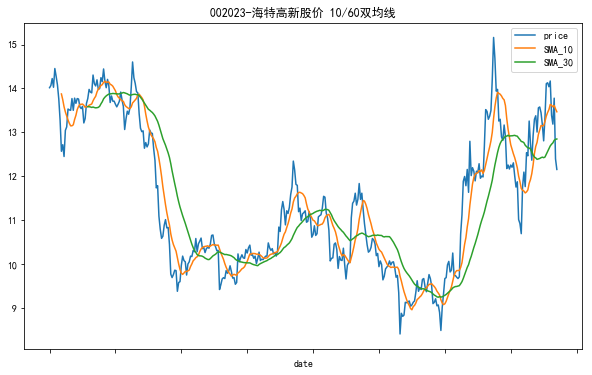

In [32]:
data[['price','SMA_10','SMA_30']].plot(title = '002023-海特高新股价 10/60双均线', figsize=(10, 6))

## 2、交易策略

In [33]:
data['position_1'] = np.where(data['SMA_10'] > data['SMA_30'], 1, 0)

In [34]:
data.head()

,price,SMA_10,SMA_30,position_1
date,,,,
2017-01-03,14.018,NaN,NaN,0
2017-01-04,14.068,NaN,NaN,0
2017-01-05,14.226,NaN,NaN,0
2017-01-06,14.028,NaN,NaN,0
2017-01-09,14.454,NaN,NaN,0


In [36]:
data['position_2'] = np.where(data['price'] > data['SMA_10'], 1, 0)
data.head()

,price,SMA_10,SMA_30,position_1,position_2
date,,,,,
2017-01-03,14.018,NaN,NaN,0,0
2017-01-04,14.068,NaN,NaN,0,0
2017-01-05,14.226,NaN,NaN,0,0
2017-01-06,14.028,NaN,NaN,0,0
2017-01-09,14.454,NaN,NaN,0,0


In [37]:
data.dropna(inplace = True)
data.head()

,price,SMA_10,SMA_30,position_1,position_2
date,,,,,
2017-02-20,13.771,13.5879,13.586500,1,1
2017-02-21,13.979,13.6196,13.585200,1,1
2017-02-22,13.919,13.6344,13.580233,1,1
2017-02-23,13.900,13.6483,13.569367,1,1
2017-02-24,14.306,13.7206,13.578633,1,1


In [38]:
data['position'] = np.where(data['position_1'] + data['position_2'] == 2, 1 , 0)

In [39]:
data.head()

,price,SMA_10,SMA_30,position_1,position_2,position
date,,,,,,
2017-02-20,13.771,13.5879,13.586500,1,1,1
2017-02-21,13.979,13.6196,13.585200,1,1,1
2017-02-22,13.919,13.6344,13.580233,1,1,1
2017-02-23,13.900,13.6483,13.569367,1,1,1
2017-02-24,14.306,13.7206,13.578633,1,1,1


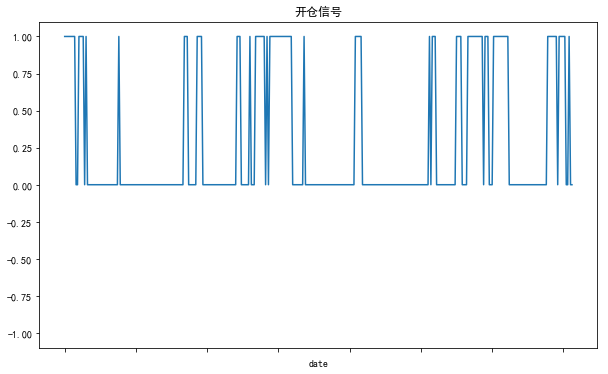

In [40]:
data['position'].plot(ylim=[-1.1, 1.1], title = '开仓信号', figsize=(10, 6))

## 3、收益及可视化

In [41]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [42]:
data.head()

,price,SMA_10,SMA_30,position_1,position_2,position,returns
date,,,,,,,
2017-02-20,13.771,13.5879,13.586500,1,1,1,NaN
2017-02-21,13.979,13.6196,13.585200,1,1,1,0.014991
2017-02-22,13.919,13.6344,13.580233,1,1,1,-0.004301
2017-02-23,13.900,13.6483,13.569367,1,1,1,-0.001366
2017-02-24,14.306,13.7206,13.578633,1,1,1,0.028790


In [43]:
data['strategy'] = data['position'].shift(1) * data['returns']  

In [21]:
data[['returns', 'strategy']].sum()

returns    -0.124413
strategy   -0.200269
dtype: float64

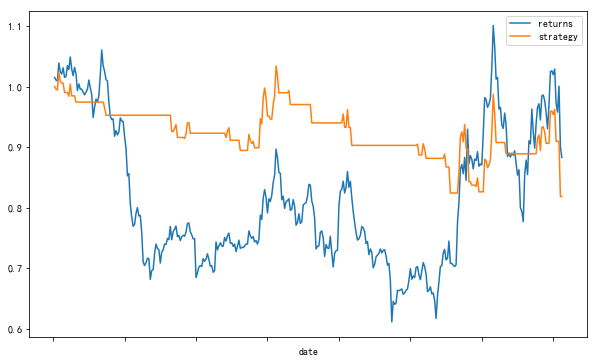

In [22]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6)) 